# Customer Sentiment Analysis of iPhone 15 128GB Reviews on Flipkart

In [1]:
pip install selenium


   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.4 MB 6.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.4 MB 6.0 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.4 MB 5.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.4 MB 5.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.4 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.3/9.4 MB 5.3 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.4 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.4 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting un


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)

In [6]:
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"
names, ratings, reviews = [], [], []

for page in range(1, 16):
    print(f"Scraping page {page}...")
    try:
        driver.get(url + f"&page={page}")
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        name_tags = soup.find_all("p", class_="_2NsDsF AwS1CA")
        rating_tags = soup.find_all("div", class_="XQDdHH Ga3i8K")
        review_tags = soup.find_all("div", class_="ZmyHeo")

        for name_tag, rating_tag, review_tag in zip(name_tags, rating_tags, review_tags):
            name = name_tag.text.strip()
            rating = rating_tag.text.strip()
            review = review_tag.get_text(strip=True)
            names.append(name)
            ratings.append(rating)
            reviews.append(review)

    except Exception as e:
        print(f"Failed to load page {page}: {e}")
        continue

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...


In [ ]:
df = pd.DataFrame({
    "Username": names,
    "Rating": ratings,
    "Review": reviews
})

In [8]:
df.head()

,Username,Rating,Review
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
1,Ajin V,5,High quality camera😍READ MORE
2,Flipkart Customer,5,Awesome photography experience. Battery backup...
3,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
4,Mousam Guha Roy,4,Very niceREAD MORE


In [10]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = remove_emojis(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Review'] = df['Review'].apply(clean_text)

In [12]:
df.head()

,Username,Rating,Review
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...
1,Ajin V,5,high quality cameraread
2,Flipkart Customer,5,awesome photography experience battery backup ...
3,Rishabh Jha,5,awesome read
4,Mousam Guha Roy,4,niceread


In [13]:
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['Review', 'Polarity']]

,Review,Polarity
0,go itamazing onebeautiful camera super fast pr...,0.266667
1,high quality cameraread,0.160000
2,awesome photography experience battery backup ...,0.733333
3,awesome read,1.000000
4,niceread,0.000000
...,...,...
113,best mobile phonecamera quality nicebattery ba...,1.000000
114,amazing phone back side phone frozen glass mak...,0.233333
115,perfectread,0.000000
116,pic quality awesomeread,0.000000


In [14]:
df['Subjectivity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df[['Review', 'Subjectivity']]

,Review,Subjectivity
0,go itamazing onebeautiful camera super fast pr...,0.633333
1,high quality cameraread,0.540000
2,awesome photography experience battery backup ...,0.700000
3,awesome read,1.000000
4,niceread,0.000000
...,...,...
113,best mobile phonecamera quality nicebattery ba...,0.300000
114,amazing phone back side phone frozen glass mak...,0.391667
115,perfectread,0.000000
116,pic quality awesomeread,0.000000


In [15]:
df['Sentiment'] = df['Polarity'].apply(lambda x: "Positive" if x >= 0.1 else "Negative")
df

,Username,Rating,Review,Polarity,Subjectivity,Sentiment
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive
1,Ajin V,5,high quality cameraread,0.160000,0.540000,Positive
2,Flipkart Customer,5,awesome photography experience battery backup ...,0.733333,0.700000,Positive
3,Rishabh Jha,5,awesome read,1.000000,1.000000,Positive
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,Negative
...,...,...,...,...,...,...
113,Sheetla Prasad Maurya,4,best mobile phonecamera quality nicebattery ba...,1.000000,0.300000,Positive
114,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,0.233333,0.391667,Positive
115,Angel Jain,5,perfectread,0.000000,0.000000,Negative
116,Mukesh Kumar,5,pic quality awesomeread,0.000000,0.000000,Negative


In [16]:
df["Polarity"].mean()

np.float64(0.4466473960753622)

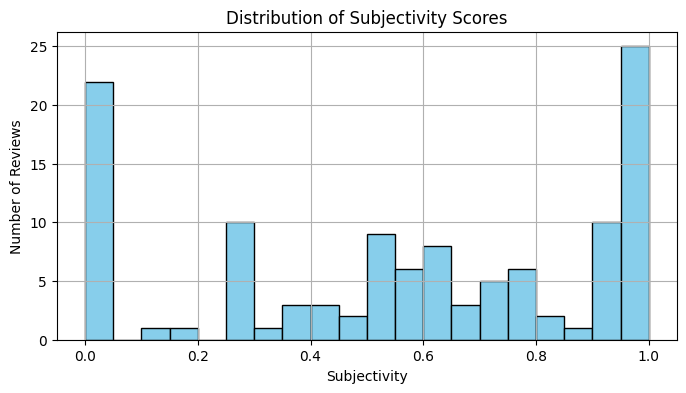

In [17]:
plt.figure(figsize=(8,4))
df['Subjectivity'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity")
plt.ylabel("Number of Reviews")
plt.show()

C:\Users\shaki\AppData\Local\Temp\ipykernel_1252\702130435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


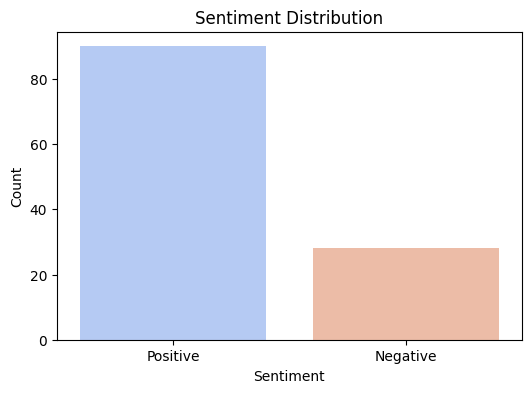

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

C:\Users\shaki\AppData\Local\Temp\ipykernel_1252\348061668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating', y='Polarity', palette='viridis')


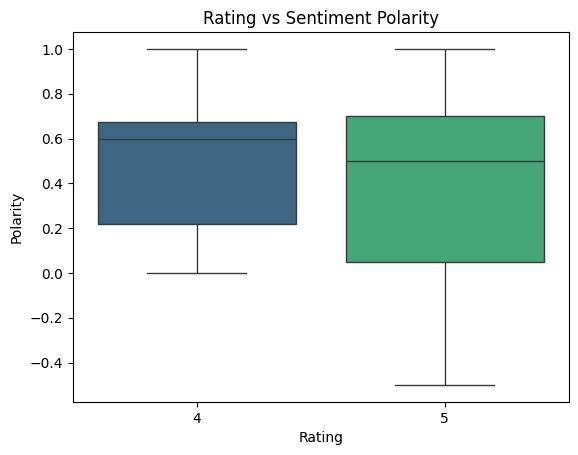

In [19]:
df['Rating'] = df['Rating'].astype(int)  # Make sure it's numeric
sns.boxplot(data=df, x='Rating', y='Polarity', palette='viridis')
plt.title("Rating vs Sentiment Polarity")
plt.show()

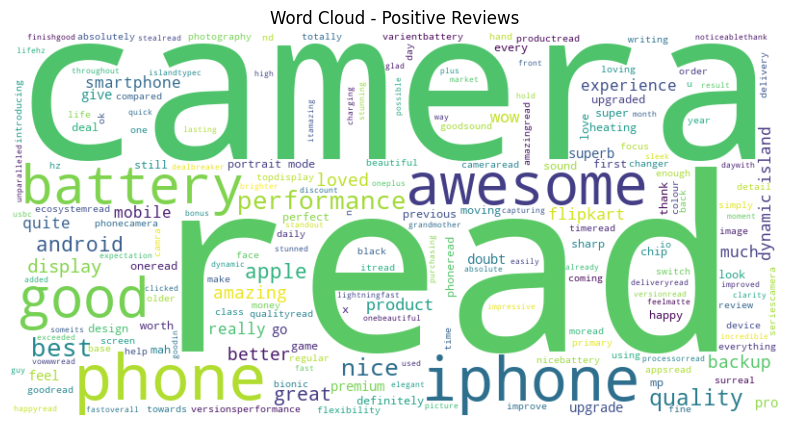

In [20]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

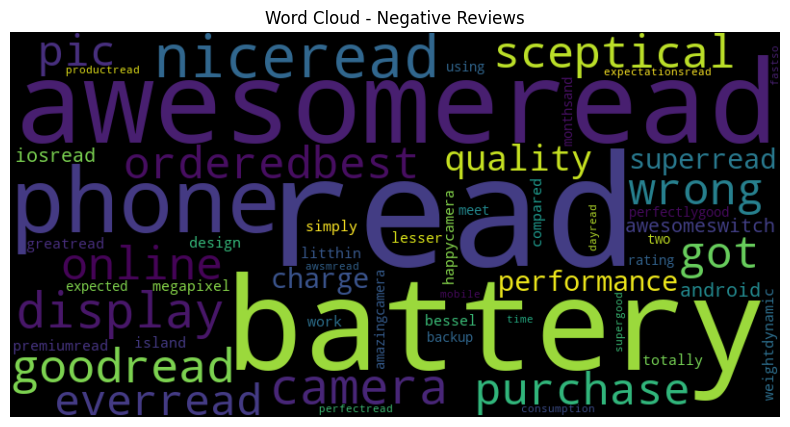

In [21]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()

C:\Users\shaki\AppData\Local\Temp\ipykernel_1252\1992792518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')


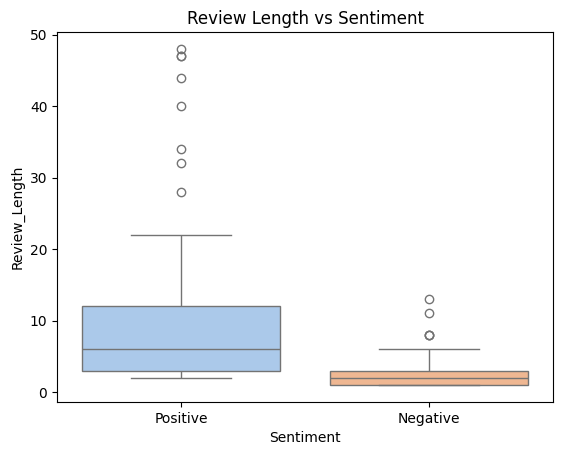

In [22]:
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')
plt.title("Review Length vs Sentiment")
plt.show()

In [23]:
df

,Username,Rating,Review,Polarity,Subjectivity,Sentiment,Review_Length
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
1,Ajin V,5,high quality cameraread,0.160000,0.540000,Positive,3
2,Flipkart Customer,5,awesome photography experience battery backup ...,0.733333,0.700000,Positive,10
3,Rishabh Jha,5,awesome read,1.000000,1.000000,Positive,2
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,Negative,1
...,...,...,...,...,...,...,...
113,Sheetla Prasad Maurya,4,best mobile phonecamera quality nicebattery ba...,1.000000,0.300000,Positive,9
114,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,0.233333,0.391667,Positive,18
115,Angel Jain,5,perfectread,0.000000,0.000000,Negative,1
116,Mukesh Kumar,5,pic quality awesomeread,0.000000,0.000000,Negative,3


Recommendations
Based on customer feedback, suggestions are provided for product improvements, customer support, and targeted marketing strategies.
Areas of high satisfaction or frequent complaint are identified to help guide business decisions.

